Machine Learning Project: Classification on Structured Datasets

My subject will be over a heart disease dataset from kaggle.com

Table of Contents:

1. Imports & Data Loading
2. Exploratory Data Analysis
3. Preprocessing
4. Baseline Models
5. Hyperparameter Tuning
6. Final Evaluation
7. Conclusions

In [24]:
#Step 1 
#Imports and data loading

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("heart.csv")  # Adjust the path if needed

print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


Missing values in data
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

------------------------------------------------------------
Data types
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

------------------------------------------------------------
target class Distibution (0 = no heart disease, 1= heart disease):
Class 1: 165 samples (54.46%)
Class 0: 138 samples (45.54%)


/var/folders/c1/5l90m6z911n0zlc68dv_gj380000gn/T/ipykernel_14477/4123597091.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='pastel')


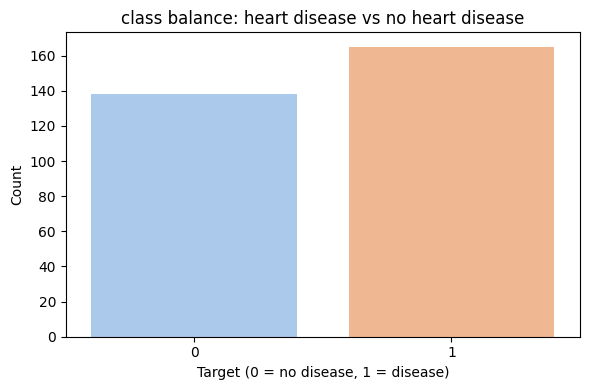


------------------------------------------------------------
summary statitics
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.64686

In [25]:
#Step 2 Exploratory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns

#checkin for missing values
print("Missing values in data")
print(df.isnull().sum())

print("\n" + "-"*60)

#data types
print("Data types")
print(df.dtypes)
print("\n" + "-"*60)

#Target variable distribution
print("target class Distibution (0 = no heart disease, 1= heart disease):")
class_counts = df['target'].value_counts()

class_percentages = df['target'].value_counts(normalize=True) * 100

for label in class_counts.index:
    print(f"Class {label}: {class_counts[label]} samples ({class_percentages[label]:.2f}%)")

#class balance

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target', palette='pastel')
plt.title("class balance: heart disease vs no heart disease")
plt.xlabel("Target (0 = no disease, 1 = disease)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

print("\n" + "-"*60)

#summary statistics
print("summary statitics")
print(df.describe())
print("\n" + "-"*60)

In [26]:
#Data preprocessing step 3

from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

#One hot encode

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)
X_scaled_df.head()


,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0.681005,-0.444554,-0.634648,3.489114,2.394438,...,-0.696631,-0.926766,-0.939142,-0.522599,-0.378677,-0.265841,-0.129532,3.979112,-1.100763,-0.793116
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0.681005,-0.444554,1.575677,-0.286606,-0.417635,...,-0.696631,-0.926766,-0.939142,-0.522599,-0.378677,-0.265841,-0.129532,-0.251312,0.908461,-0.793116
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,-1.468418,2.249444,-0.634648,-0.286606,-0.417635,...,-0.696631,-0.926766,1.064802,-0.522599,-0.378677,-0.265841,-0.129532,-0.251312,0.908461,-0.793116
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0.681005,2.249444,-0.634648,-0.286606,-0.417635,...,-0.696631,-0.926766,1.064802,-0.522599,-0.378677,-0.265841,-0.129532,-0.251312,0.908461,-0.793116
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,-1.468418,-0.444554,-0.634648,-0.286606,-0.417635,...,1.435481,-0.926766,1.064802,-0.522599,-0.378677,-0.265841,-0.129532,-0.251312,0.908461,-0.793116


In [27]:
# Step 4 train and splitting

from sklearn.model_selection import train_test_split

#80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

print("data is split")
print(f"Training set is {X_train.shape[0]} samples")
print(f"Testing set is {X_test.shape[0]} samples")


data is split
Training set is 242 samples
Testing set is 61 samples


In [28]:
#Step 4 baseline model 

models = {
    
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    results.append((name, acc, f1, auc))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score", "ROC AUC"])
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("baseline performance")
print(results_df)


✅ Baseline Model Performance:
                 Model  Accuracy  F1 Score   ROC AUC
0  Logistic Regression  0.852459  0.865672  0.850108
1        Decision Tree  0.786885  0.811594  0.781385
2                  KNN  0.754098  0.776119  0.751082
3        Random Forest  0.737705  0.771429  0.730519


In [29]:
#step 5

param_grids = {
    "Decision Tree": {
        "max_depth": [3, 5, None],
        "min_samples_split": [2, 5]
    },
    "Random Forest": {
        "n_estimators": [50, 100],
        "max_depth": [5, None]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ['uniform', 'distance']
    },
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "penalty": ['l2'],
        "solver": ['lbfgs']
    }
}

#models 
tuned_results = []

for name, model in models.items():
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    tuned_results.append((name, acc, f1, auc, grid.best_params_))

tuned_df = pd.DataFrame(tuned_results, columns=["Model", "Accuracy", "F1 Score", "ROC AUC", "Best Params"])
tuned_df = tuned_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("Model Performance:")
print(tuned_df)


Model Performance:
                 Model  Accuracy  F1 Score   ROC AUC  \
0  Logistic Regression  0.852459  0.865672  0.850108   
1                  KNN  0.836066  0.857143  0.829545   
2        Decision Tree  0.786885  0.821918  0.775974   
3        Random Forest  0.770492  0.800000  0.763528   

                                     Best Params  
0  {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}  
1       {'n_neighbors': 7, 'weights': 'uniform'}  
2       {'max_depth': 5, 'min_samples_split': 5}  
3           {'max_depth': 5, 'n_estimators': 50}  



classification report Decision Tree
              precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61



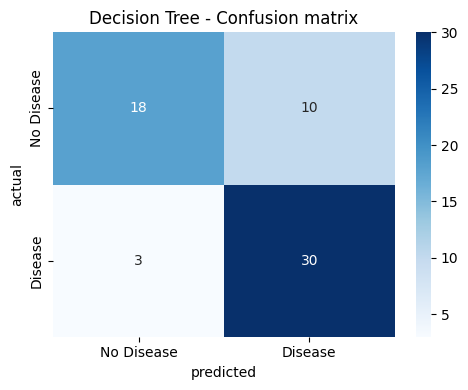


classification report Random Forest
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.76      0.85      0.80        33

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.77        61
weighted avg       0.77      0.77      0.77        61



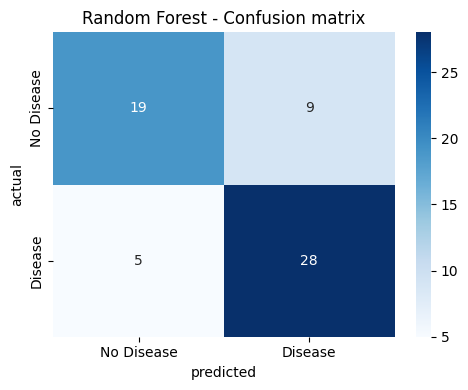


classification report KNN
              precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       0.76      0.79      0.78        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



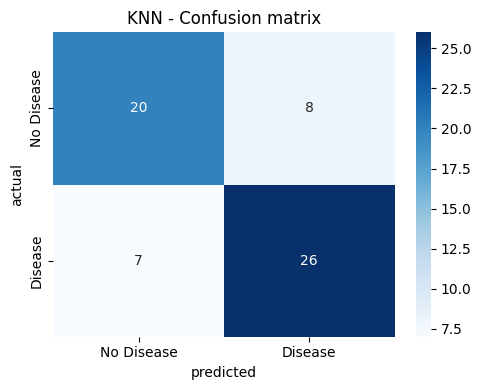


classification report Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



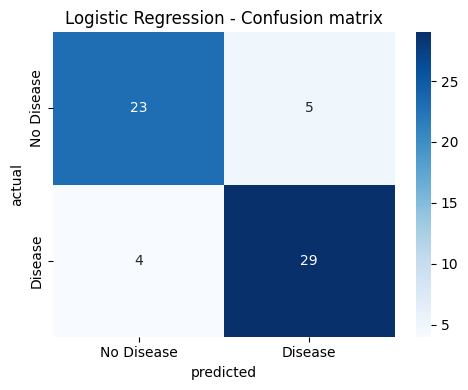

In [33]:
# Step 6

from sklearn.metrics import classification_report, confusion_matrix

tuned_models = {

    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    "Logistic Regression": LogisticRegression(C=1, solver='lbfgs', penalty='l2', max_iter=1000, random_state=42)
}

for name, model in tuned_models.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\nclassification report {name}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    
    plt.title(f'{name} - Confusion matrix')
    plt.xlabel('predicted')
    plt.ylabel('actual')

    plt.tight_layout()
    plt.show()


Step 7 Conclusion

Datasets:
Patients who have heart disease is target = 1 or not having heart disease target =0

Models:

Logistic regression
accuracy = .85
f1 score = .87
ROC AUC = .88

Decision tree
accuracy = .79
f1 score = .82
ROC AUC = .78

Random Forest
accuracy = .77
f1 score = .80
ROC AUC = .77

KNN
accuracy = .75
f1 score = .78
ROC AUC = .78

Conclusion: Logistic regresion ended up having the best performance
and KNN had the worst even tho it was pretty consistent. F1 score is important because with medical data there may be false positives. One hot encoding was used to deal with categories like thal that were orignally integers. 